In [ ]:
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
from scipy.stats import linregress
import matplotlib.pyplot as plt

/home/qubit/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [3]:
df = pd.read_csv('~/Downloads/tmp/MRK421.csv')

In [4]:
x = df.iloc[:, 0]
y = df.iloc[:, 1]
p = df.iloc[:, 3]
q = df.iloc[:, 4]

In [5]:
mu = y.mean()
T = x.max() - x.min()
N = len(x)
P_of_nu = np.array([])

In [6]:
for i in range(1, int(N/2 + 1)):
    P_of_nu = np.append(P_of_nu, ((2*T) / (mu ** 2 * N**2)) * (np.sum(y * np.cos(2 * np.pi * i * x / T)) ** 2 + np.sum(y * np.cos(2 * np.pi * i * x / T)) ** 2))

In [7]:
nu = np.array([i / T for i in range(1, int(N/2 + 1))])

In [8]:
P_stat = ((2*T) / (mu ** 2 * N**2)) * np.sum(q - p)**2 / N

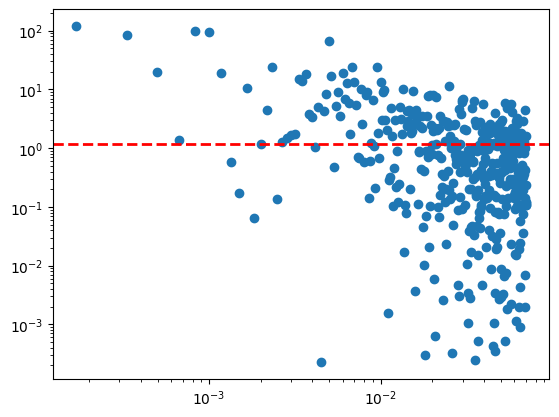

In [9]:
plt.scatter(nu, P_of_nu)
plt.xscale('log')
plt.yscale('log')
plt.axhline(y=P_stat, color='red', linestyle='--', linewidth=2, label='y=6')

In [10]:
def power_law(nu, A, n):
    return A * nu**(n)

# Curve fitting
params, covariance = curve_fit(power_law, nu, P_of_nu, p0=[1e-5, -2])  # Initial guess

# Extract fitted parameters
A_fit, n_fit = params

# Generate the fitted curve
nu_fit = np.linspace(nu.min(), nu.max(), 500)
P_fit = power_law(nu_fit, A_fit, n_fit)

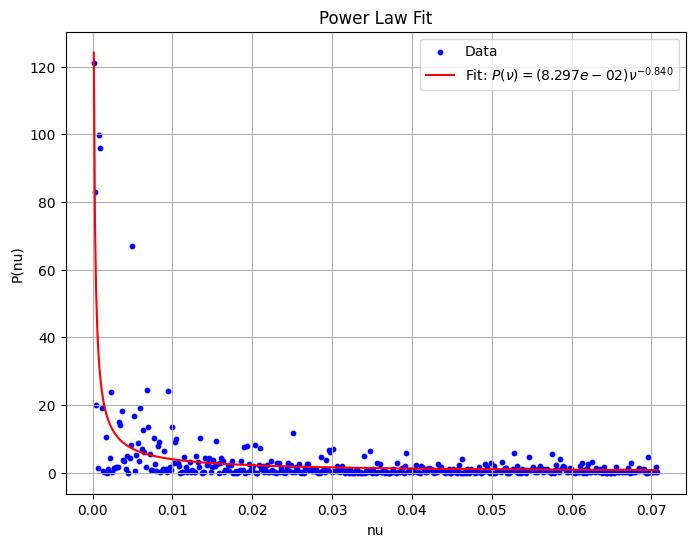

Fitted Parameters:
A = 8.297e-02
n = -0.840


In [11]:
# Plot the data and the fit
plt.figure(figsize=(8, 6))
plt.scatter(nu, P_of_nu, color="blue", label="Data", s=10)
plt.plot(nu_fit, P_fit, color="red", label=f"Fit: $P(\\nu) = ({A_fit:.3e}) \\nu^{{{n_fit:.3f}}}$")
plt.xlabel("nu")
plt.ylabel("P(nu)")
plt.title("Power Law Fit")
plt.legend()
plt.grid()
plt.show()

# Print fitted parameters
print(f"Fitted Parameters:\nA = {A_fit:.3e}\nn = {n_fit:.3f}")

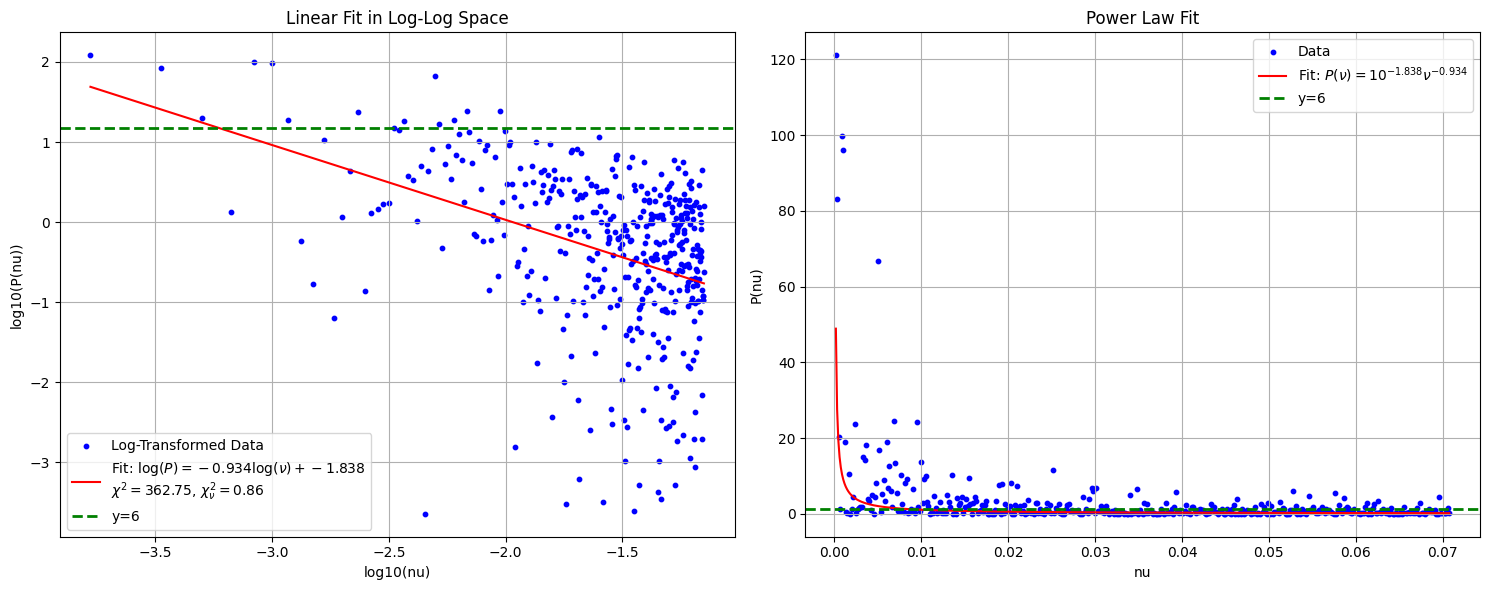

Fitted Parameters:
A = 1.451e-02
n = -0.934
R-squared = 0.146
Chi-Square: 362.750
Reduced Chi-Square: 0.858


In [ ]:
# Log-transform the data
log_nu = np.log10(nu)
log_P_of_nu = np.log10(P_of_nu)

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(log_nu, log_P_of_nu)

# Generate fitted line in log-log space
log_P_fit = slope * log_nu + intercept

# Back-transform to original space for plotting
nu_fit = np.linspace(nu.min(), nu.max(), 500)
P_fit = 10**(slope * np.log10(nu_fit) + intercept)

# Calculate chi-square
chi_square = np.sum(((log_P_of_nu - log_P_fit) ** 2) / np.std(log_P_of_nu)**2)

# Calculate degrees of freedom
degrees_of_freedom = len(log_P_of_nu) - len(params)

# Calculate reduced chi-square
reduced_chi_square = chi_square / degrees_of_freedom

# Plot the data and fit
fig, axs = plt.subplots(1, 2,figsize=(15, 6))
axs[0].scatter(log_nu, log_P_of_nu, color="blue", label="Log-Transformed Data", s=10)
axs[0].plot(log_nu, log_P_fit, color="red", 
            label=f"Fit: $\\log(P) = {slope:.3f}\\log(\\nu) + {intercept:.3f}$\n"
                  f"$\\chi^2 = {chi_square:.2f}$, $\\chi^2_\\nu = {reduced_chi_square:.2f}$")
axs[0].axhline(y=P_stat, color='green', linestyle='--', linewidth=2, label='y=6')
axs[0].set_xlabel("log10(nu)")
axs[0].set_ylabel("log10(P(nu))")
axs[0].set_title("Linear Fit in Log-Log Space")
axs[0].legend()
axs[0].grid()

# Plot original data with power-law fit
axs[1].scatter(nu, P_of_nu, color="blue", label="Data", s=10)
axs[1].plot(nu_fit, P_fit, color="red", label=f"Fit: $P(\\nu) = 10^{{{intercept:.3f}}} \\nu^{{{slope:.3f}}}$")
axs[1].axhline(y=P_stat, color='green', linestyle='--', linewidth=2, label='y=6')
axs[1].set_xlabel("nu")
axs[1].set_ylabel("P(nu)")
axs[1].set_title("Power Law Fit")
axs[1].legend()
axs[1].grid()

plt.tight_layout()
plt.show()

# Print results
A_fit = 10**intercept  # Back-transform to get A
print(f"Fitted Parameters:\nA = {A_fit:.3e}\nn = {slope:.3f}\nR-squared = {r_value**2:.3f}")
print(f"Chi-Square: {chi_square:.3f}")
print(f"Reduced Chi-Square: {reduced_chi_square:.3f}")

/tmp/ipykernel_13156/3711499981.py:10: RuntimeWarning: overflow encountered in scalar power
  C_i = 10 ** log_Ci  # Convert back from log scale
/tmp/ipykernel_13156/3711499981.py:16: RuntimeWarning: overflow encountered in power
  P_nu = A_i * term1 * (term2 ** exponent) + C_i
/tmp/ipykernel_13156/3711499981.py:13: RuntimeWarning: overflow encountered in power
  term2 = (1/2) * (1 + (nu / nu_br) ** (1/Delta))
/tmp/ipykernel_13156/3711499981.py:17: RuntimeWarning: divide by zero encountered in log10
  return np.log10(P_nu)  # Return log-transformed power
/tmp/ipykernel_13156/3711499981.py:27: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, pcov = curve_fit(log_broken_power_law, log_nu, log_P_of_nu, p0)


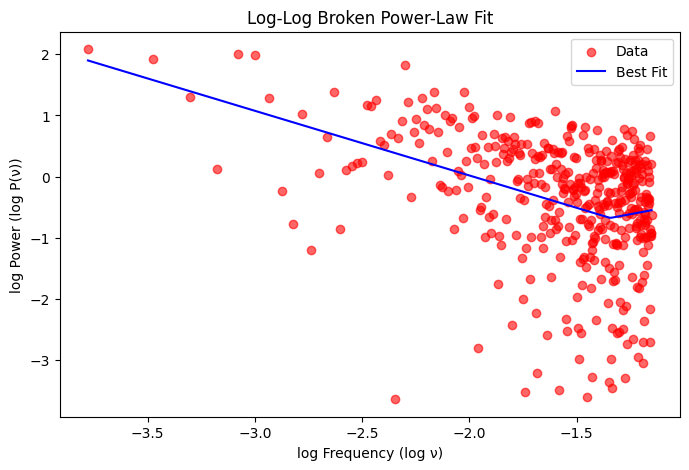

log_Ai_fit, log_nu_br_fit, alpha1_fit, alpha2_fit, Delta_fit, log_Ci_fit :
 -0.673097903158539 -1.3437210050660897 -0.6589770892433073 1.0581438983615268 -0.007899316080830986 -66924.90335462081


In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Define the log-transformed broken power-law model
def log_broken_power_law(log_nu, log_Ai, log_nu_br, alpha1, alpha2, Delta, log_Ci):
    nu = 10 ** log_nu  # Convert back from log scale
    nu_br = 10 ** log_nu_br  # Convert back from log scale
    A_i = 10 ** log_Ai  # Convert back from log scale
    C_i = 10 ** log_Ci  # Convert back from log scale
    
    term1 = (nu / nu_br) ** (-alpha1)
    term2 = (1/2) * (1 + (nu / nu_br) ** (1/Delta))
    exponent = (alpha1 - alpha2) * Delta
    
    P_nu = A_i * term1 * (term2 ** exponent) + C_i
    return np.log10(P_nu)  # Return log-transformed power

# Load or define your log-transformed data
log_nu = np.log10(nu)  # Log-transformed frequency
log_P_of_nu = np.log10(P_of_nu)  # Log-transformed power

# Initial guesses for parameters (log-transformed A_i and C_i)
p0 = [1, np.log10(20), 1.5, 2.5, 0.5, 0]  # Log-transformed A_i and C_i

# Fit the data
popt, pcov = curve_fit(log_broken_power_law, log_nu, log_P_of_nu, p0)

# Extract fitted parameters
log_Ai_fit, log_nu_br_fit, alpha1_fit, alpha2_fit, Delta_fit, log_Ci_fit = popt

# Generate fitted curve
log_P_fit_broken = log_broken_power_law(log_nu, *popt)

# Plot the results
plt.figure(figsize=(8, 5))
plt.scatter(log_nu, log_P_of_nu, label="Data", color="red", alpha=0.6)
plt.plot(log_nu, log_P_fit_broken, label="Best Fit", color="blue")
plt.xlabel("log Frequency (log ν)")
plt.ylabel("log Power (log P(ν))")
plt.legend()
plt.title("Log-Log Broken Power-Law Fit")
plt.show()

print('log_Ai_fit, log_nu_br_fit, alpha1_fit, alpha2_fit, Delta_fit, log_Ci_fit :\n', *popt)

In [16]:
# Calculate chi-square
chi_square = np.sum(((log_P_of_nu - log_P_fit_broken) ** 2) / np.std(log_P_of_nu)**2)

# Calculate degrees of freedom
degrees_of_freedom = len(log_P_of_nu) - len(popt)

# Calculate reduced chi-square
reduced_chi_square = chi_square / degrees_of_freedom

print(f"Chi-Square: {chi_square:.3f}")
print(f"Reduced Chi-Square: {reduced_chi_square:.3f}")

Chi-Square: 360.530
Reduced Chi-Square: 0.860


Slope, Reduced Chi Square (1 to 2), Remove ethe outliers, BLL, FRSQ, BCU